Mean Returns:
 FB.1      0.000555
GOOG.1    0.000189
NFLX.1   -0.001250
AMZN.1   -0.000302
AAPL.1   -0.000056
dtype: float64
Standard Deviation of Returns:
 FB.1      0.020943
GOOG.1    0.018474
NFLX.1    0.027119
AMZN.1    0.022313
AAPL.1    0.020421
dtype: float64

Random Portfolio Weights: [0.2878973  0.17350771 0.23970886 0.06538159 0.23350454]
Portfolio Mean Return: -0.0001398565171767392
Portfolio Standard Deviation: 0.018312779943541142


<ipython-input-32-00231fa08924>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(stock, (std_returns[i], mean_returns[i]), textcoords="offset points", xytext=(5, 5), ha='center')


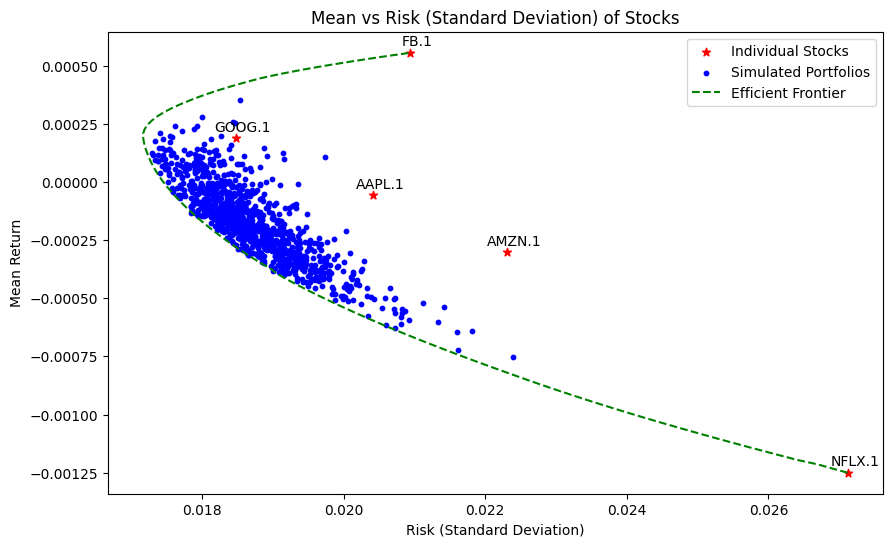


 Yes, the efficiency frontier appears as the lower envelope of the blue points in the plot.


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# 1: Load the dataset
df = pd.read_csv('/content/sample_data/Stocks_ClosePrice.csv')
returns = df[['FB.1', 'GOOG.1', 'NFLX.1', 'AMZN.1', 'AAPL.1']].dropna()
returns = returns.astype(float)

mean_returns = returns.mean()
std_returns = returns.std()

print("Mean Returns:\n", mean_returns)
print("Standard Deviation of Returns:\n", std_returns)

# Step 2: Plot mean vs standard deviation of these five returns using red stars
plt.figure(figsize=(10, 6))
plt.scatter(std_returns, mean_returns, color='red', marker='*', label='Individual Stocks')
for i, stock in enumerate(returns.columns):
    plt.annotate(stock, (std_returns[i], mean_returns[i]), textcoords="offset points", xytext=(5, 5), ha='center')

plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Mean Return')
plt.title('Mean vs Risk (Standard Deviation) of Stocks')

# Step 3: Randomly selected portfolio weights (non-negative and sum to 1)
def random_weights(n):
    weights = np.random.rand(n)
    return weights / np.sum(weights)

weights = random_weights(len(mean_returns))
portfolio_mean = np.dot(weights, mean_returns)
portfolio_std = np.sqrt(np.dot(weights.T, np.dot(returns.cov(), weights)))

print("\nRandom Portfolio Weights:", weights)
print("Portfolio Mean Return:", portfolio_mean)
print("Portfolio Standard Deviation:", portfolio_std)

# Step 4: Simulate 1000 portfolios
num_portfolios = 1000
port_means = []
port_stds = []

for _ in range(num_portfolios):
    weights = random_weights(len(mean_returns))
    port_mean = np.dot(weights, mean_returns)
    port_std = np.sqrt(np.dot(weights.T, np.dot(returns.cov(), weights)))

    port_means.append(port_mean)
    port_stds.append(port_std)

# Step 5: Plot the simulated portfolios on the same figure (blue points)
plt.scatter(port_stds, port_means, color='blue', marker='o', s=10, label='Simulated Portfolios')
plt.legend()

# Step 6: Efficiency frontier (no short sales)
def portfolio_stats(weights):
    port_mean = np.dot(weights, mean_returns)
    port_std = np.sqrt(np.dot(weights.T, np.dot(returns.cov(), weights)))
    return np.array([port_std, port_mean])

def minimize_risk(weights):
    return portfolio_stats(weights)[0]

def efficient_frontier(target_return):
    cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
            {'type': 'eq', 'fun': lambda x: np.dot(x, mean_returns) - target_return})
    bounds = [(0, 1) for _ in range(len(mean_returns))]
    result = minimize(minimize_risk, len(mean_returns) * [1. / len(mean_returns)], method='SLSQP', bounds=bounds, constraints=cons)
    return result

target_returns = np.linspace(min(mean_returns), max(mean_returns), 100)
frontier_stds = []

for target in target_returns:
    res = efficient_frontier(target)
    frontier_stds.append(portfolio_stats(res.x)[0])

plt.plot(frontier_stds, target_returns, color='green', linestyle='--', label='Efficient Frontier')
plt.legend()

plt.show()

# 6
print("\n Yes, the efficiency frontier appears as the lower envelope of the blue points in the plot.")
